### Loading the dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('J:\Encryptix\Spam SMS Detection\spam.csv',encoding='ISO-8859-1')

<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\BHOLENDRA PRATAP\AppData\Local\Temp\ipykernel_19228\1934057917.py:1: SyntaxWarning: invalid escape sequence '\E'
  df=pd.read_csv('J:\Encryptix\Spam SMS Detection\spam.csv',encoding='ISO-8859-1')


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### steps in the project
###### 1. data cleaning
###### 2 EDA (exploratory data analysis)
###### 3 text preprocessing
###### 4 model building
###### 5 evaluation of model
###### 6 imporvements depending on the evaluation
###### 7 website
###### 8 website deployment

#### Data cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df['Unnamed: 2']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5567    NaN
5568    NaN
5569    NaN
5570    NaN
5571    NaN
Name: Unnamed: 2, Length: 5572, dtype: object

In [7]:
df['v1']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [8]:
df['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [9]:
df['v2'][23]

'Aft i finish my lunch then i go str down lor. Ard 3 smth lor. U finish ur lunch already?'

In [10]:
df.shape

(5572, 5)

In [11]:
#removing the garbage columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#renaming the column
df = df.rename(columns={'v1':'Category','v2':'Message'})

In [14]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [16]:
df.shape

(5572, 2)

In [17]:
#now adding numerical labels to category of message.
df['labels'] = df['Category'].map({'spam': 1, 'ham': 0})

In [18]:
df.head()

,Category,Message,labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [19]:
df['labels'].value_counts()

labels
0    4825
1     747
Name: count, dtype: int64

In [20]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [21]:
##checking missing values
df.isnull().sum() 
#no null values in columns

Category    0
Message     0
labels      0
dtype: int64

In [22]:
##checking for duplicates
df.duplicated().sum()

403

In [23]:
##now we will remove duplicates because they are less and our data is textual data not numerical.
#remove the duplicates values
df=df.drop_duplicates(keep='first')

In [24]:
df.duplicated().sum()

0

In [25]:
df.shape

(5169, 3)

In [26]:
df.head()

,Category,Message,labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


##### Intial cleaning is done till now.

##### EDA

In [27]:
df['labels'].value_counts()

labels
0    4516
1     653
Name: count, dtype: int64

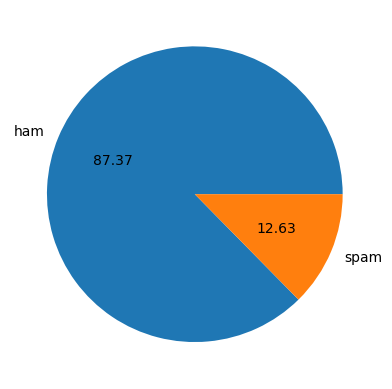

In [28]:
import matplotlib.pyplot as plt 
plt.pie(df['labels'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

our dataset is considered imbalanced if one class is <40% of the total data. Since ham is only 12.63%, this is a severely imbalanced dataset.
This not hard and fast rule but yes it's observed in many cases that this threshold is benficial in many cases.
So we will move forward and will keep in account that our data is imbalanced at time of training our model.

In [29]:
import nltk
import re

In [30]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [31]:
df['num_characters'] = df['Message'].apply(len)

In [32]:
df.head()

,Category,Message,labels,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [33]:
#num of words
df['num_words'] = df['Message'].apply(lambda x: len(word_tokenize(x)))

In [34]:
df.head()

,Category,Message,labels,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24
1,ham,Ok lar... Joking wif u oni...,0,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,ham,U dun say so early hor... U c already then say...,0,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [35]:
#num of sentences
df['num_sent'] = df['Message'].apply(lambda x: len(sent_tokenize(x)))

In [36]:
df.head()

,Category,Message,labels,num_characters,num_words,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [37]:

df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
# comparing and analyzing the data which is ham 
df[df['labels'] == 0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# comparing and analyzing the data which is spam 
df[df['labels'] == 1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Hence we can getting idea that spam is in large compared to ham message.

In [40]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

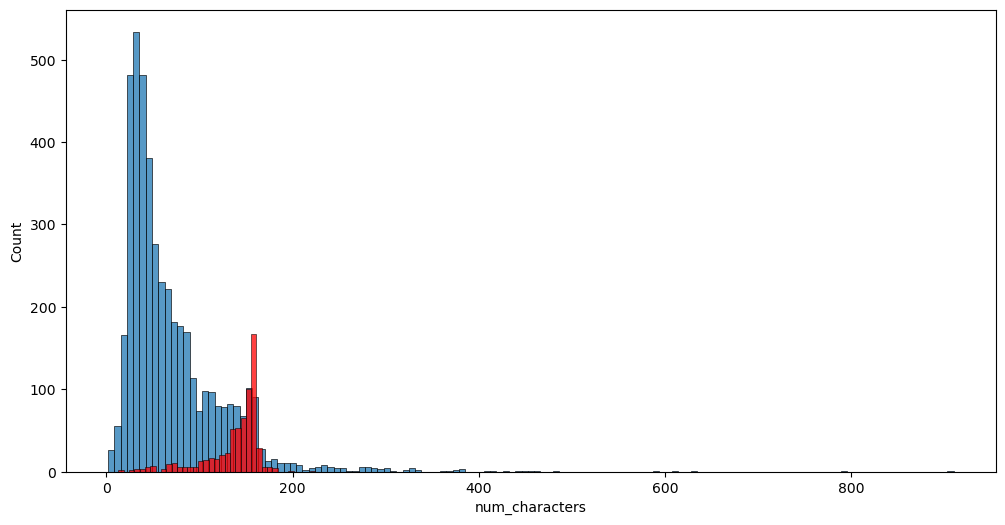

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['labels'] == 0]['num_characters'])
sns.histplot(df[df['labels'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

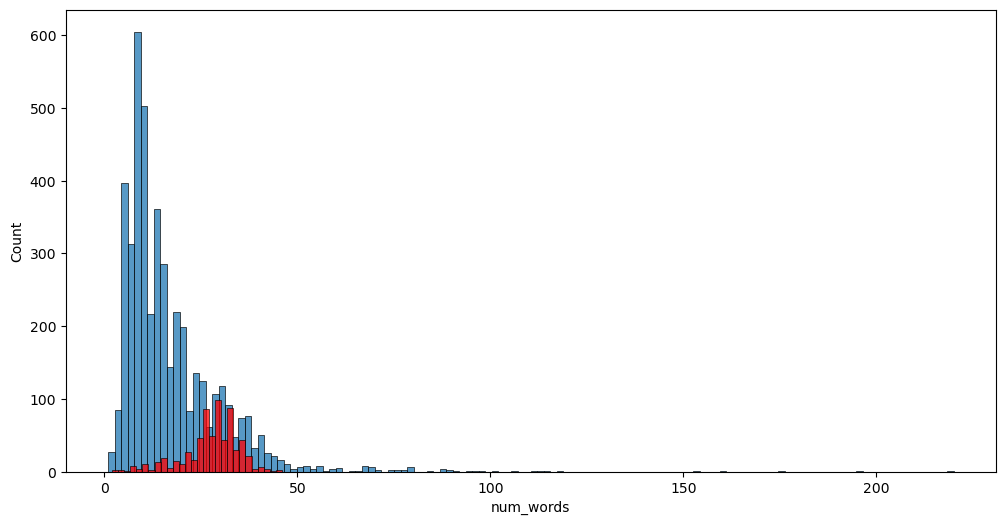

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['labels'] == 0]['num_words'])
sns.histplot(df[df['labels'] == 1]['num_words'],color='red')

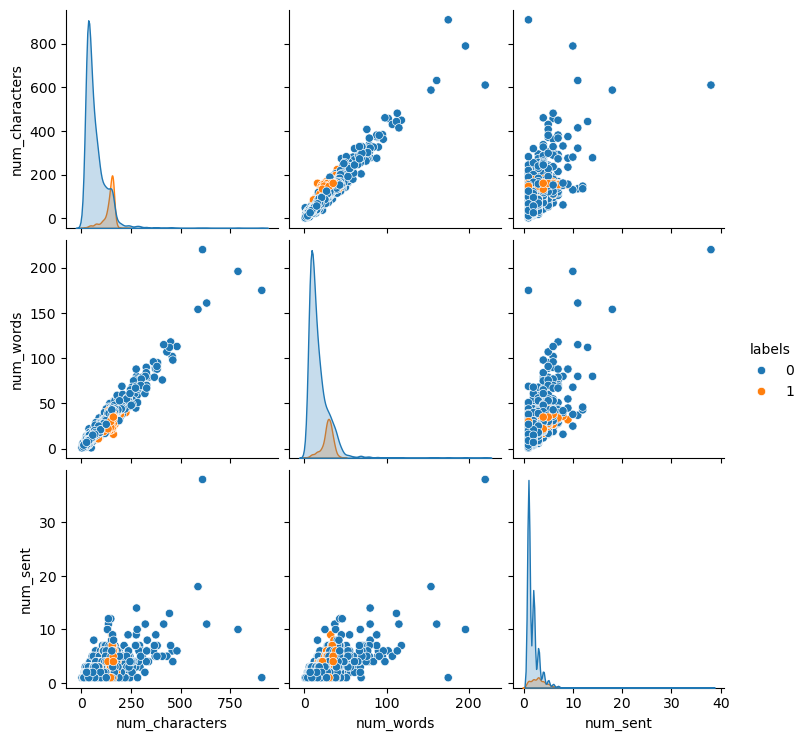

In [43]:
###now getting relations between these columns:
sns.pairplot(df,hue='labels')

In [44]:
df.head()

,Category,Message,labels,num_characters,num_words,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [45]:
df.drop(columns=['Category'],inplace=True)

In [46]:
df.head()

,Message,labels,num_characters,num_words,num_sent
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


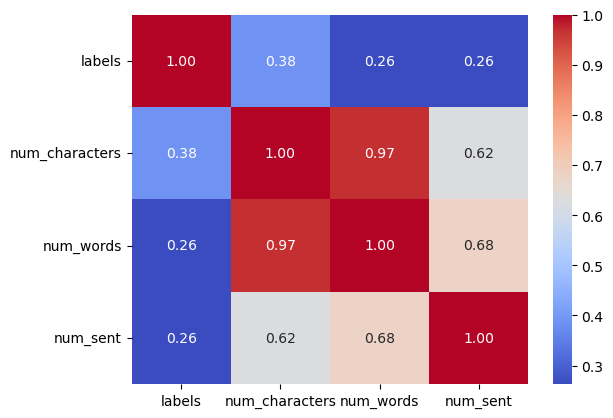

In [47]:
numeric_df = df.select_dtypes(include=['number'])  # Keeps only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Here we can see that mostly other columns are highly correlated since we cannot take all columns but we prefer num_characters.

#### Data Preprocessing
Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [48]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
wl=WordNetLemmatizer()

In [49]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(wl.lemmatize(i))
    
            
    return " ".join(y)

In [50]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymore tonight k cried enough today'

In [51]:
df['transformed_message'] = df['Message'].apply(transform_text)

In [52]:
df.head()

,Message,labels,num_characters,num_words,num_sent,transformed_message
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think go usf life around though


In [53]:
df.shape

(5169, 6)

#### Vectorization
Now we will convert this transformed text into vectors :There are various techniques but as we use most precised one that is TF-IDF vectorizer.

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [55]:
X = tfidf.fit_transform(df['transformed_message']).toarray()

In [56]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
X.shape

(5169, 3000)

In [58]:
y = df['labels'].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [60]:
y.shape

(5169,)

We have converted our text into vectors now we will start building model:
#### Model Building and evaluation.

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#### Firstly we check all variants of Naive bayes

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [64]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [65]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8810444874274661
[[796 100]
 [ 23 115]]
0.5348837209302325


In [66]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [67]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9845261121856866
[[896   0]
 [ 16 122]]
1.0


#### Now tryimg other classifiying algorithms:
As we know that for nlp tasks Naive bayes is most preferable and its giving us in our case good response but we will also try out with others also.

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [69]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)


In [77]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'gnb':gnb,
    'bnb':bnb,
    'mnb':mnb,
    'RF': rfc, 
    'AdaBoost': abc
}

In [78]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [79]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  DT
Accuracy -  0.9381044487427466
Precision -  0.8557692307692307
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9494949494949495
For  gnb
Accuracy -  0.8810444874274661
Precision -  0.5348837209302325
For  bnb
Accuracy -  0.9845261121856866
Precision -  1.0
For  mnb
Accuracy -  0.9748549323017408
Precision -  1.0
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551


c:\Users\BHOLENDRA PRATAP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9661508704061895
Precision -  0.9478260869565217


In [80]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [81]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,bnb,0.984526,1.000000
6,mnb,0.974855,1.000000
7,RF,0.974855,0.982759
0,SVC,0.977756,0.975207
3,LR,0.952611,0.949495
8,AdaBoost,0.966151,0.947826
2,DT,0.938104,0.855769
4,gnb,0.881044,0.534884


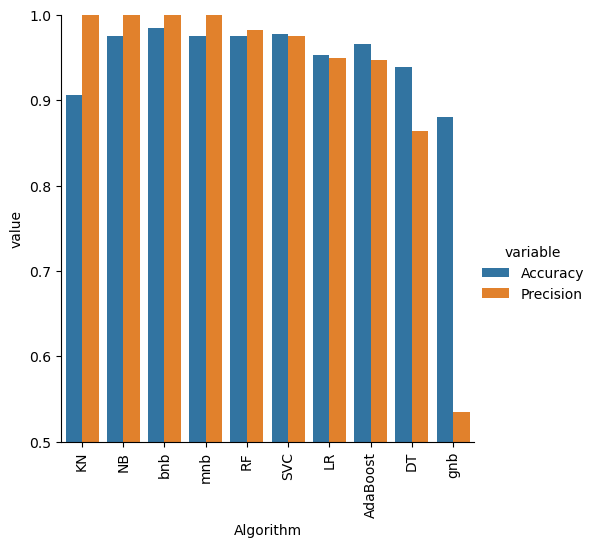

In [82]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

Hence Bernoulii naive bayes giving most accuracy, hence we will dump this model and also our vectorizer model..

In [83]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
#done.